In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
#df = DataReader('TSLA', data_source='yahoo', start='2012-01-01', end=datetime.now())
df = DataReader('ORCL', data_source='yahoo', start='2016-01-01', end=datetime.now())
# Show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,36.950001,36.430000,36.840000,36.529999,10332400.0,32.759197
2016-01-04,36.009998,35.360001,36.009998,35.750000,18784400.0,32.191887
2016-01-05,36.119999,35.490002,35.860001,35.639999,25340700.0,32.092842
2016-01-06,36.139999,35.360001,35.500000,35.820000,18165700.0,32.254929
2016-01-07,35.680000,34.880001,35.250000,35.040001,22591400.0,31.552557
...,...,...,...,...,...,...
2022-07-25,75.430000,74.339996,75.099998,74.860001,5721600.0,74.860001
2022-07-26,75.300003,73.709999,74.800003,74.029999,7284400.0,74.029999
2022-07-27,76.120003,74.320000,74.379997,75.870003,6677200.0,75.870003


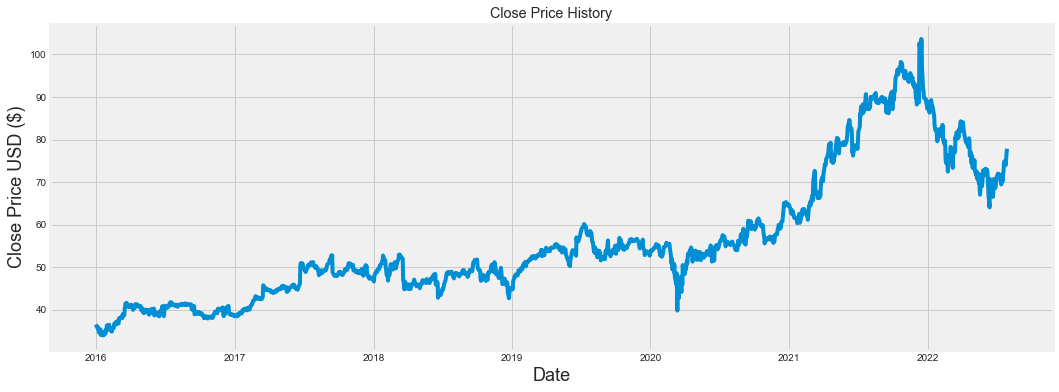

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1325

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03715392],
       [0.02596473],
       [0.02438676],
       ...,
       [0.60149193],
       [0.61827572],
       [0.62975177]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.03715392, 0.02596473, 0.02438676, 0.02696889, 0.01577969,
       0.01018509, 0.01434514, 0.02051356, 0.00200837, 0.0121934 ,
       0.00258213, 0.00875055, 0.        , 0.00258213, 0.01233683,
       0.00573808, 0.01850525, 0.01391481, 0.0199398 , 0.03399803,
       0.03414146, 0.02022665, 0.025104  , 0.03600634, 0.02524748,
       0.02395642, 0.01635351, 0.01807491, 0.01291065, 0.02295226,
       0.02524748, 0.03858847, 0.03858847, 0.04074021, 0.04547413,
       0.03744083, 0.03858847, 0.04805626, 0.04332234, 0.04074021,
       0.05809788, 0.05479844, 0.05666333, 0.05666333, 0.06340556,
       0.0603931 , 0.06512696, 0.05895855, 0.0718692 , 0.06828291,
       0.06885673, 0.09008754, 0.09568214, 0.1081624 , 0.11002728,
       0.1067279 , 0.09769045, 0.1008464 , 0.09582556, 0.0969732 ])]
[0.10084639652307131]

[array([0.03715392, 0.02596473, 0.02438676, 0.02696889, 0.01577969,
       0.01018509, 0.01434514, 0.02051356, 0.00200837, 0.0121934 ,
       0.00258213, 0.00875055, 0.  

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1265/1265 [==============================] - 24s 18ms/step - loss: 8.6452e-04


In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.794573243821957

C:\Users\David\AppData\Local\Temp/ipykernel_6304/3344400724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


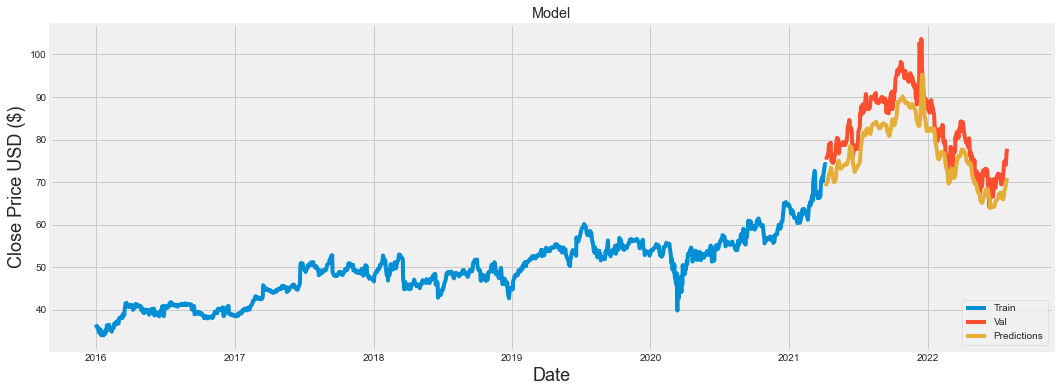

In [9]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid


,Close,Predictions
Date,,
2021-04-08,75.279999,69.012650
2021-04-09,75.580002,69.589493
2021-04-12,76.120003,70.088058
2021-04-13,76.669998,70.538353
2021-04-14,76.820000,70.968742
...,...,...
2022-07-25,74.860001,68.925964
2022-07-26,74.029999,69.736855
2022-07-27,75.870003,70.093063


In [11]:
#Get the quote 
apple_quote=DataReader('ORCL',data_source='yahoo',start='2016-01-01',end=datetime.now())
#create a new data frame
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to array

last_60_days=new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)

#create an empty list
X_test=[]
#append the past 60days
X_test.append(last_60_days_scaled)

#convert the X_test data set to a numpy 
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[71.616135]]
